<a href="https://colab.research.google.com/github/RafsanJany-44/ARC_Machine/blob/main/Dynamic_Feature_Selection_with_Tunning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [132]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [133]:
import numpy as np
import pandas as pd
dataset=pd.read_csv("/content/drive/MyDrive/Iqram Sir/Tinnitus_ALR_EEG_features_2022.08.10_final.csv")

In [148]:
dataset.head()

,Subjects,Subject Type/Class,Test Type,Gap duration,n0_gap_peak_ms,p1_gap_peak_ms,n1_gap_peak_ms,p2_gap_peak_ms,n2_gap_peak_ms,p3_gap_peak_ms,...,Total EEG Power,Relative Alpha,Relative Beta,Relative Theta,Relative Delta,Relative Gamma,DTR,DTABR,ATR,ABR
0,'01_AJW_30_02',Control,Test,20ms,101,147,214,263,366,105,...,0.000032,0.1710,0.0955,0.561,0.152,0.0203,0.272,2.670,0.306,1.790
1,'01_CGO_63_01',Control,Test,20ms,132,155,217,301,383,131,...,0.000061,0.1330,0.1630,0.396,0.227,0.0804,0.574,2.100,0.336,0.814
2,'01_KBJ_45_01',Control,Test,20ms,107,160,221,305,396,128,...,0.000420,0.1520,0.3290,0.170,0.152,0.1980,0.895,0.669,0.894,0.461
3,'02_KCH_26_02',Control,Test,20ms,77,200,233,268,379,166,...,0.000334,0.0715,0.0599,0.227,0.591,0.0502,2.610,6.230,0.315,1.190
4,'03_HMK_49_01',Control,Test,20ms,153,128,224,264,337,147,...,0.000063,0.1470,0.1030,0.434,0.279,0.0377,0.643,2.860,0.338,1.420


In [150]:
X = dataset.iloc[:, 4:]
y = dataset.iloc[:, 1]


#Feature Selection

In [151]:
from sklearn.feature_selection import SelectKBest
bestfeatures = SelectKBest(k=10)
fit = bestfeatures.fit(X,y)

In [152]:
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

In [153]:
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']

<font color='blue' size=6><b>Input</b></font>

In [154]:
number_of_feat=int(input("Number Of Best Features: "))

Number Of Best Features: 20


In [155]:
imp=featureScores.nlargest(number_of_feat,'Score')
print(imp)

                     Specs      Score
47         p3_gap_peak_amp  45.163320
72          gap_auc_n1p2_R  45.064316
43         p1_gap_peak_amp  42.386323
46         n2_gap_peak_amp  39.547251
38     n1p3_interval_nogap  37.128241
74          gap_auc_n1p2_L  35.014730
69          gap_auc_p1n1_R  28.903982
33     p1p2_interval_nogap  27.769729
76          gap_auc_n1p2n2  26.659414
65     p2n2_gap_nogap_diff  24.767763
67   p2n2_gap_no_gap_ratio  22.874364
66   n1p2_gap_no_gap_ratio  21.021758
128         Relative Alpha  19.903881
60         p1n1_nogap_diff  19.901617
68          gap_auc_n0p1_L  19.776172
52       n2_nogap_peak_amp  19.324790
40     p2p3_interval_nogap  18.849610
54           n0p1_gap_diff  18.367833
134                  DTABR  18.086402
39     p2n2_interval_nogap  17.759879


In [156]:
list_of_feat=[]

for i in range(number_of_feat):
  list_of_feat.append(imp.iloc[:,0:1].values[i][0])

In [157]:
X_new = dataset[list_of_feat]
y_new = dataset.iloc[:, 1]

In [159]:
X_new.shape

(330, 20)

In [160]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_new, y_new, test_size = 0.2, random_state = 0)

In [ ]:
result={}



---





---



#ADABOOST

In [161]:
from sklearn.ensemble import AdaBoostClassifier

classifier = AdaBoostClassifier(random_state=0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result["ADA Default"]=accuracy_score(y_test, y_pred)

[[31  8]
 [11 16]]
              precision    recall  f1-score   support

     Control       0.74      0.79      0.77        39
     Patient       0.67      0.59      0.63        27

    accuracy                           0.71        66
   macro avg       0.70      0.69      0.70        66
weighted avg       0.71      0.71      0.71        66

Accurecy:  0.7121212121212122


1/200 round completed......................... Accurecy: 0.7121212121212122
2/200 round completed......................... Accurecy: 0.7424242424242424
3/200 round completed......................... Accurecy: 0.7878787878787878
4/200 round completed......................... Accurecy: 0.7727272727272727
5/200 round completed......................... Accurecy: 0.7727272727272727
6/200 round completed......................... Accurecy: 0.7575757575757576
7/200 round completed......................... Accurecy: 0.7727272727272727
8/200 round completed......................... Accurecy: 0.7575757575757576
9/200 round completed......................... Accurecy: 0.7575757575757576
10/200 round completed......................... Accurecy: 0.7575757575757576
11/200 round completed......................... Accurecy: 0.7575757575757576
12/200 round completed......................... Accurecy: 0.7727272727272727
13/200 round completed......................... Accurecy: 0.7727272727272727
14/200 r

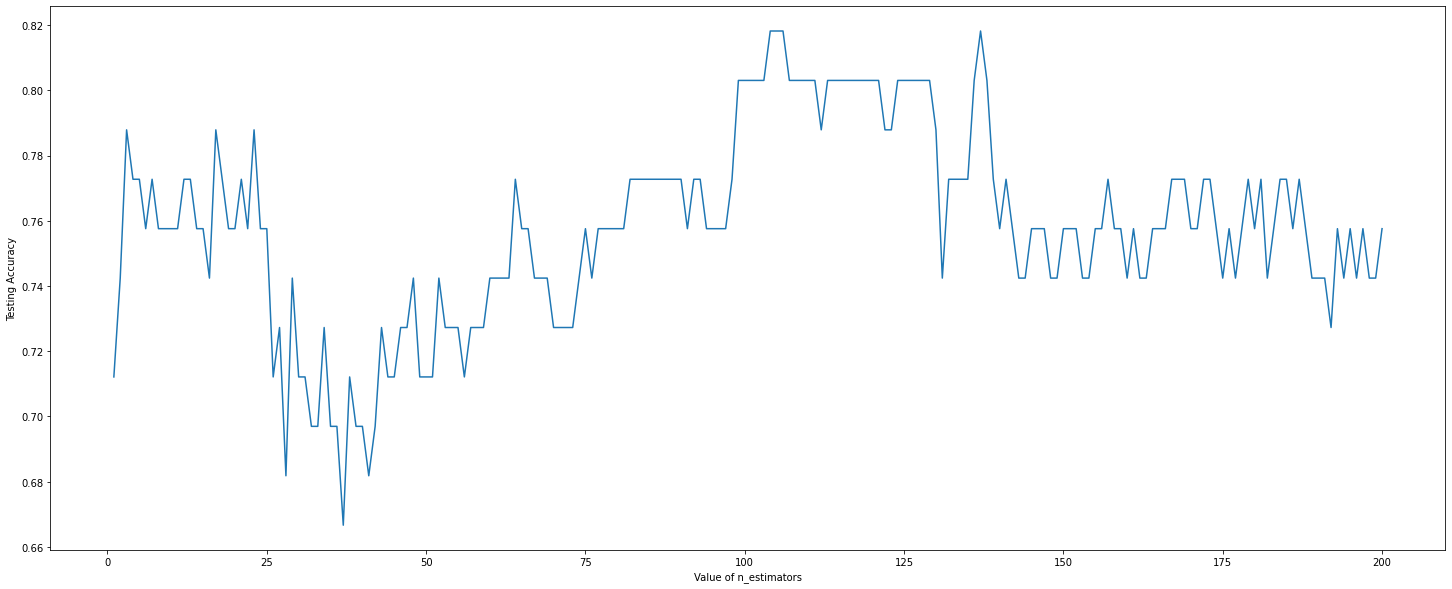

In [162]:
from sklearn.ensemble import AdaBoostClassifier
N=200
k_range = range (1,N+1)
scores={}
scores_list = []
for k in k_range:
  classifier = AdaBoostClassifier(n_estimators=k,random_state=0)
  classifier.fit(X_train, y_train)
  y_pred=classifier.predict(X_test)
  scores[k] = accuracy_score(y_test,y_pred)
  scores_list.append(accuracy_score(y_test,y_pred))
  print(str(k)+"/"+str(N)+" round completed......................... Accurecy: "+str(accuracy_score(y_test,y_pred)))



%matplotlib inline
import matplotlib.pyplot as plt
#plot the relationship between K and the testing accuracy
plt.figure(figsize = (25,10))
plt.plot(k_range,scores_list)
plt.xlabel('Value of n_estimators')
plt.ylabel ('Testing Accuracy')



print("The best n_estimators:")
best_estimator=list(scores.keys())[scores_list.index(max(scores_list))]
print(best_estimator)

In [163]:
from sklearn.ensemble import AdaBoostClassifier

classifier = AdaBoostClassifier(n_estimators=best_estimator,random_state=0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result["ADA Best Estimator"]=accuracy_score(y_test, y_pred)

[[34  5]
 [ 7 20]]
              precision    recall  f1-score   support

     Control       0.83      0.87      0.85        39
     Patient       0.80      0.74      0.77        27

    accuracy                           0.82        66
   macro avg       0.81      0.81      0.81        66
weighted avg       0.82      0.82      0.82        66

Accurecy:  0.8181818181818182




---



---



#Graddient Boosting

In [164]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import RepeatedStratifiedKFold

classifier = GradientBoostingClassifier(random_state=0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result["Graddient Boosting Default"]=accuracy_score(y_test, y_pred)

[[33  6]
 [ 8 19]]
              precision    recall  f1-score   support

     Control       0.80      0.85      0.83        39
     Patient       0.76      0.70      0.73        27

    accuracy                           0.79        66
   macro avg       0.78      0.77      0.78        66
weighted avg       0.79      0.79      0.79        66

Accurecy:  0.7878787878787878


1/150 round completed......................... Accurecy: 0.7727272727272727
2/150 round completed......................... Accurecy: 0.803030303030303
3/150 round completed......................... Accurecy: 0.7575757575757576
4/150 round completed......................... Accurecy: 0.7575757575757576
5/150 round completed......................... Accurecy: 0.7575757575757576
6/150 round completed......................... Accurecy: 0.7727272727272727
7/150 round completed......................... Accurecy: 0.7575757575757576
8/150 round completed......................... Accurecy: 0.7878787878787878
9/150 round completed......................... Accurecy: 0.7727272727272727
10/150 round completed......................... Accurecy: 0.7878787878787878
11/150 round completed......................... Accurecy: 0.7575757575757576
12/150 round completed......................... Accurecy: 0.7727272727272727
13/150 round completed......................... Accurecy: 0.7727272727272727
14/150 ro

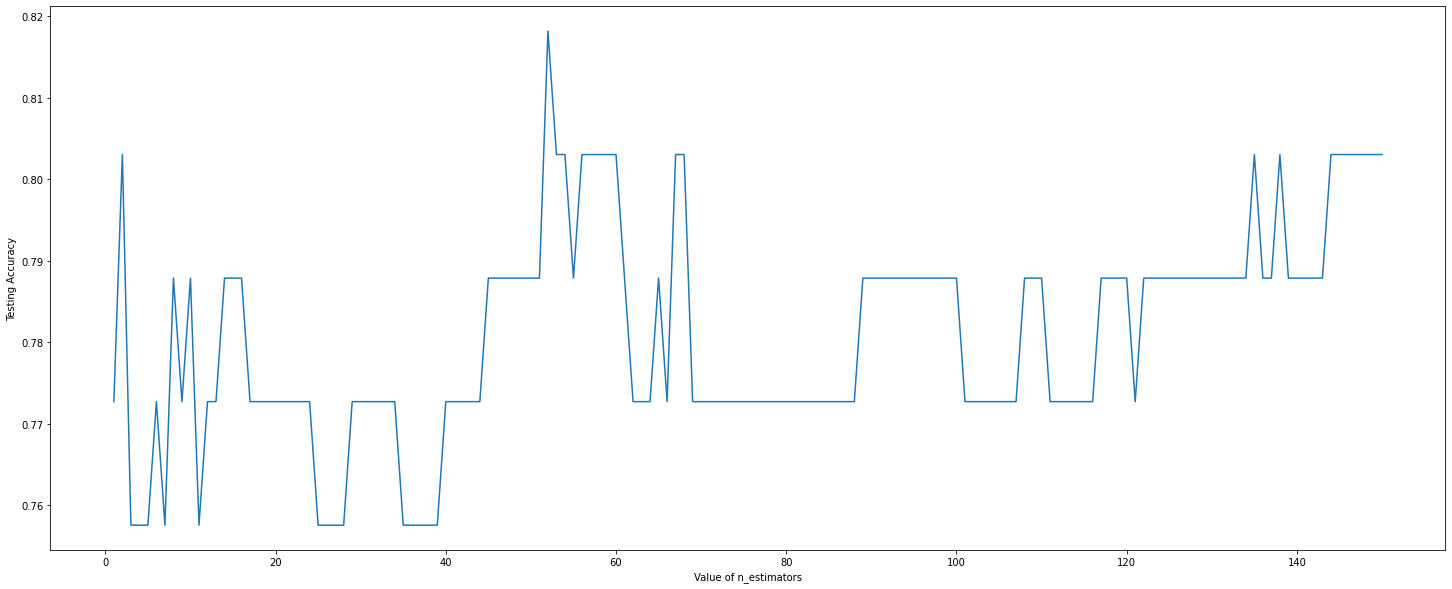

In [165]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
N=150
k_range = range (1,N+1)
scores={}
scores_list = []
for k in k_range:
  classifier = GradientBoostingClassifier(n_estimators=k,random_state=0)
  classifier.fit(X_train, y_train)
  y_pred=classifier.predict(X_test)
  scores[k] = accuracy_score(y_test,y_pred)
  scores_list.append(accuracy_score(y_test,y_pred))
  print(str(k)+"/"+str(N)+" round completed......................... Accurecy: "+str(accuracy_score(y_test,y_pred)))



%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize = (25,10))
plt.plot(k_range,scores_list)
plt.xlabel('Value of n_estimators')
plt.ylabel ('Testing Accuracy')



print("The best n_estimators:")
best_estimator=list(scores.keys())[scores_list.index(max(scores_list))]
print(best_estimator)

1/30 round completed......................... Accurecy: 0.8181818181818182
2/30 round completed......................... Accurecy: 0.7727272727272727
3/30 round completed......................... Accurecy: 0.7878787878787878
4/30 round completed......................... Accurecy: 0.7424242424242424
5/30 round completed......................... Accurecy: 0.7272727272727273
6/30 round completed......................... Accurecy: 0.7878787878787878
7/30 round completed......................... Accurecy: 0.7424242424242424
8/30 round completed......................... Accurecy: 0.7121212121212122
9/30 round completed......................... Accurecy: 0.7424242424242424
10/30 round completed......................... Accurecy: 0.7424242424242424
11/30 round completed......................... Accurecy: 0.7424242424242424
12/30 round completed......................... Accurecy: 0.7424242424242424
13/30 round completed......................... Accurecy: 0.7424242424242424
14/30 round completed

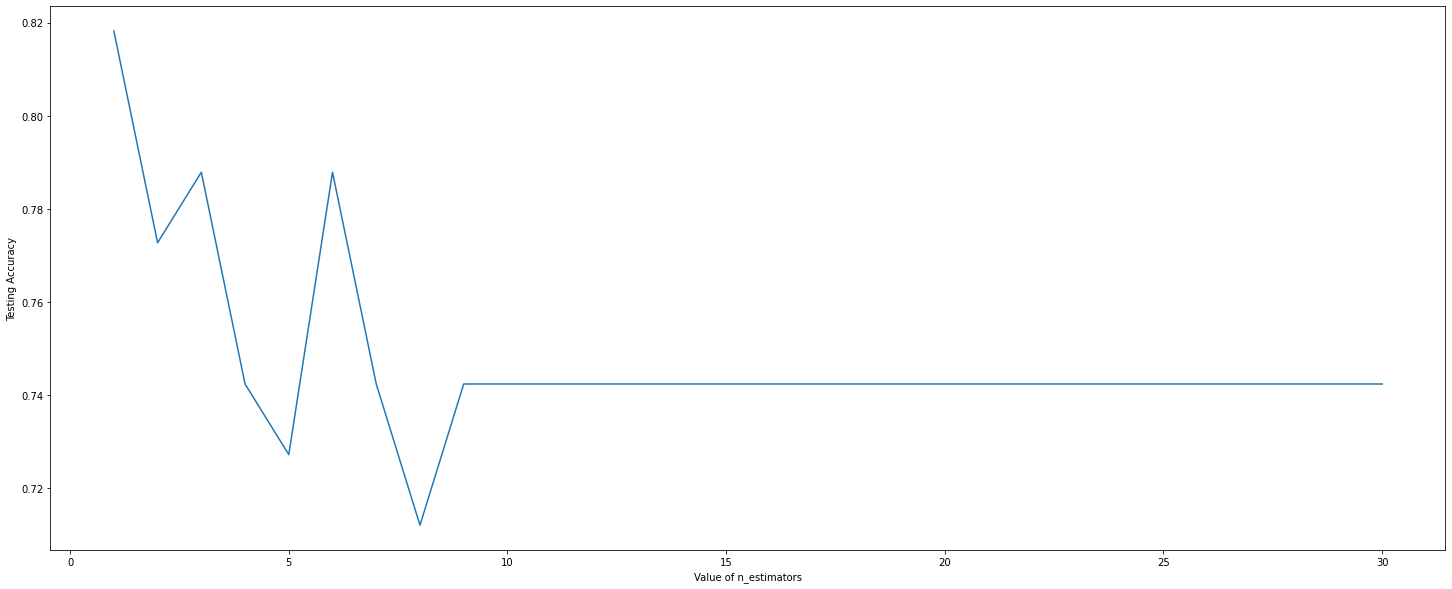

In [166]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
N=30
k_range = range (1,N+1)
scores={}
scores_list = []
for k in k_range:
  classifier = GradientBoostingClassifier(max_depth=k,random_state=0)
  classifier.fit(X_train, y_train)
  y_pred=classifier.predict(X_test)
  scores[k] = accuracy_score(y_test,y_pred)
  scores_list.append(accuracy_score(y_test,y_pred))
  print(str(k)+"/"+str(N)+" round completed......................... Accurecy: "+str(accuracy_score(y_test,y_pred)))



%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize = (25,10))
plt.plot(k_range,scores_list)
plt.xlabel('Value of n_estimators')
plt.ylabel ('Testing Accuracy')



print("The best Depth:")
best_depth=list(scores.keys())[scores_list.index(max(scores_list))]
print(best_depth)

In [167]:
from sklearn.ensemble import GradientBoostingClassifier

classifier = GradientBoostingClassifier(n_estimators=best_estimator,random_state=0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result["Graddient Best Estimator"]=accuracy_score(y_test, y_pred)

[[33  6]
 [ 6 21]]
              precision    recall  f1-score   support

     Control       0.85      0.85      0.85        39
     Patient       0.78      0.78      0.78        27

    accuracy                           0.82        66
   macro avg       0.81      0.81      0.81        66
weighted avg       0.82      0.82      0.82        66

Accurecy:  0.8181818181818182


In [168]:
from sklearn.ensemble import GradientBoostingClassifier

classifier = GradientBoostingClassifier(max_depth=best_depth,random_state=0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))

result["Graddient Boost Best depth"]=accuracy_score(y_test, y_pred)

[[33  6]
 [ 6 21]]
              precision    recall  f1-score   support

     Control       0.85      0.85      0.85        39
     Patient       0.78      0.78      0.78        27

    accuracy                           0.82        66
   macro avg       0.81      0.81      0.81        66
weighted avg       0.82      0.82      0.82        66

Accurecy:  0.8181818181818182


In [169]:
from sklearn.ensemble import GradientBoostingClassifier

classifier = GradientBoostingClassifier(n_estimators=best_estimator,max_depth=best_depth,random_state=0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))

result["Graddient Boosting ALL"]=accuracy_score(y_test, y_pred)

[[33  6]
 [ 6 21]]
              precision    recall  f1-score   support

     Control       0.85      0.85      0.85        39
     Patient       0.78      0.78      0.78        27

    accuracy                           0.82        66
   macro avg       0.81      0.81      0.81        66
weighted avg       0.82      0.82      0.82        66

Accurecy:  0.8181818181818182




---



---



#KNN

In [170]:
from sklearn.neighbors import KNeighborsClassifier
KNN_class = KNeighborsClassifier()
KNN_class.fit(X_train, y_train)
y_pred=KNN_class.predict(X_test)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result["KNN Default"]=accuracy_score(y_test, y_pred)

[[34  5]
 [11 16]]
              precision    recall  f1-score   support

     Control       0.76      0.87      0.81        39
     Patient       0.76      0.59      0.67        27

    accuracy                           0.76        66
   macro avg       0.76      0.73      0.74        66
weighted avg       0.76      0.76      0.75        66

Accurecy:  0.7575757575757576


1/200 round completed......................... Accurecy: 0.6666666666666666
2/200 round completed......................... Accurecy: 0.7272727272727273
3/200 round completed......................... Accurecy: 0.7272727272727273
4/200 round completed......................... Accurecy: 0.7121212121212122
5/200 round completed......................... Accurecy: 0.7575757575757576
6/200 round completed......................... Accurecy: 0.7424242424242424
7/200 round completed......................... Accurecy: 0.7121212121212122
8/200 round completed......................... Accurecy: 0.7424242424242424
9/200 round completed......................... Accurecy: 0.7121212121212122
10/200 round completed......................... Accurecy: 0.7424242424242424
11/200 round completed......................... Accurecy: 0.7727272727272727
12/200 round completed......................... Accurecy: 0.7575757575757576
13/200 round completed......................... Accurecy: 0.7575757575757576
14/200 r

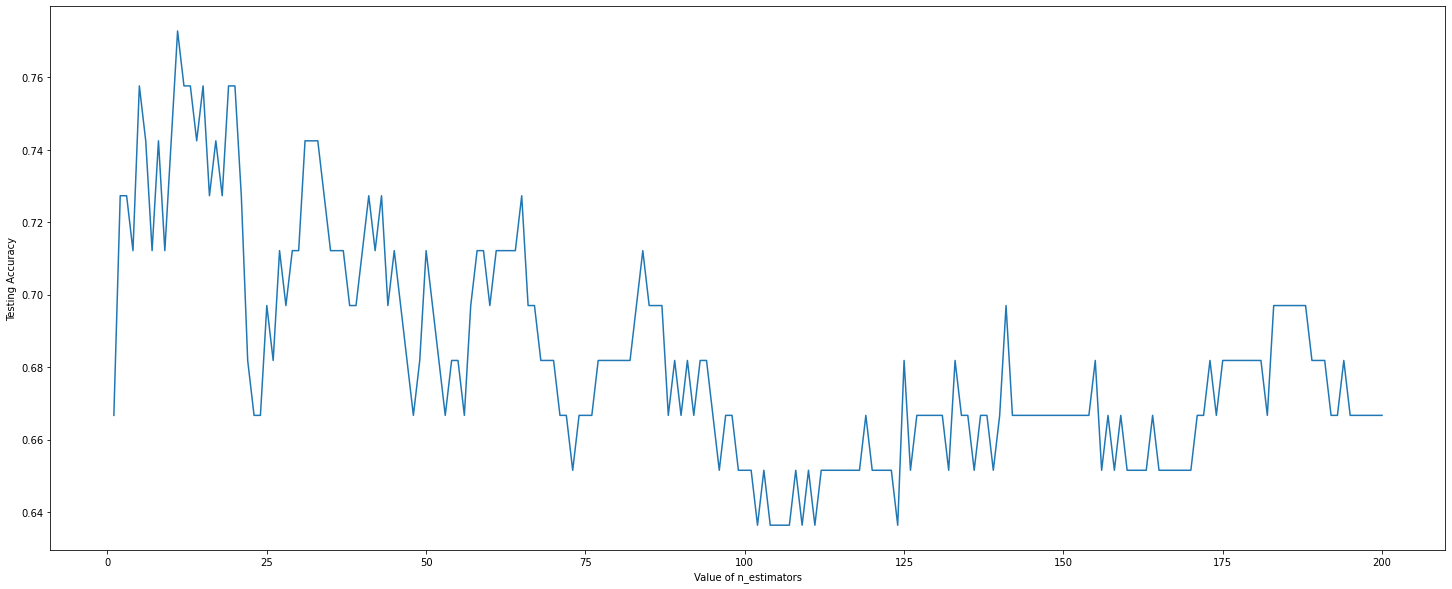

In [171]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
Neighbors=200
k_range = range (1,Neighbors+1)
scores={}
scores_list = []
for k in k_range:
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(X_train, y_train)
  y_pred=knn.predict(X_test)
  scores[k] = accuracy_score(y_test,y_pred)
  scores_list.append(accuracy_score(y_test,y_pred))
  print(str(k)+"/"+str(Neighbors)+" round completed......................... Accurecy: "+str(accuracy_score(y_test,y_pred)))


%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize = (25,10))
plt.plot(k_range,scores_list)
plt.xlabel('Value of n_estimators')
plt.ylabel ('Testing Accuracy')



print("The best Depth:")
best=list(scores.keys())[scores_list.index(max(scores_list))]
print(best)

In [172]:
from sklearn.neighbors import KNeighborsClassifier
KNN_class = KNeighborsClassifier(n_neighbors=best)
KNN_class.fit(X_train, y_train)
y_pred=KNN_class.predict(X_test)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result["KNN Best Neighbors"]=accuracy_score(y_test, y_pred)

[[35  4]
 [11 16]]
              precision    recall  f1-score   support

     Control       0.76      0.90      0.82        39
     Patient       0.80      0.59      0.68        27

    accuracy                           0.77        66
   macro avg       0.78      0.75      0.75        66
weighted avg       0.78      0.77      0.77        66

Accurecy:  0.7727272727272727




---



---



#Random Forest

In [173]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(random_state=0)
classifier.fit(X_train, y_train)
y_pred=classifier.predict(X_test)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result["Random Forest Default"]=accuracy_score(y_test, y_pred)

[[34  5]
 [ 8 19]]
              precision    recall  f1-score   support

     Control       0.81      0.87      0.84        39
     Patient       0.79      0.70      0.75        27

    accuracy                           0.80        66
   macro avg       0.80      0.79      0.79        66
weighted avg       0.80      0.80      0.80        66

Accurecy:  0.803030303030303


1/150 round completed......................... Accurecy: 0.7121212121212122
2/150 round completed......................... Accurecy: 0.7727272727272727
3/150 round completed......................... Accurecy: 0.7878787878787878
4/150 round completed......................... Accurecy: 0.8333333333333334
5/150 round completed......................... Accurecy: 0.8636363636363636
6/150 round completed......................... Accurecy: 0.8181818181818182
7/150 round completed......................... Accurecy: 0.803030303030303
8/150 round completed......................... Accurecy: 0.7575757575757576
9/150 round completed......................... Accurecy: 0.803030303030303
10/150 round completed......................... Accurecy: 0.803030303030303
11/150 round completed......................... Accurecy: 0.803030303030303
12/150 round completed......................... Accurecy: 0.8181818181818182
13/150 round completed......................... Accurecy: 0.803030303030303
14/150 round 

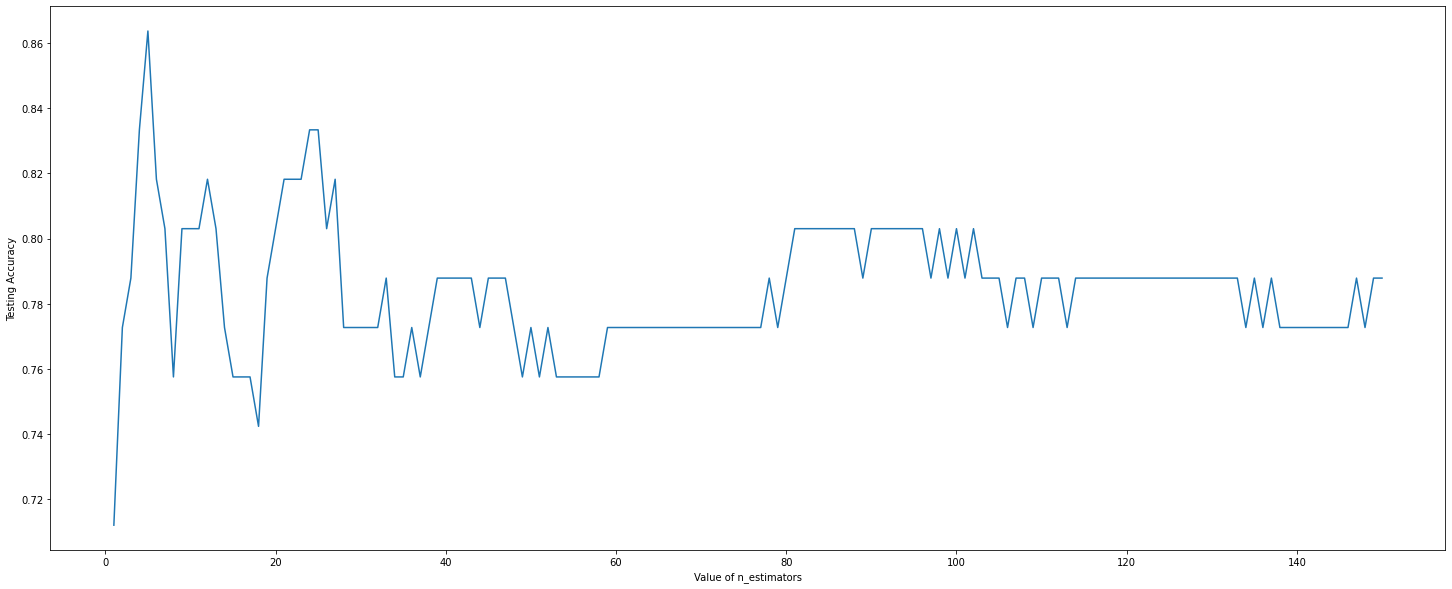

In [174]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
N=150
k_range = range (1,N+1)
scores={}
scores_list = []
for k in k_range:
  classifier = RandomForestClassifier(n_estimators=k,random_state=0)
  classifier.fit(X_train, y_train)
  y_pred=classifier.predict(X_test)
  scores[k] = accuracy_score(y_test,y_pred)
  scores_list.append(accuracy_score(y_test,y_pred))
  print(str(k)+"/"+str(N)+" round completed......................... Accurecy: "+str(accuracy_score(y_test,y_pred)))



%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize = (25,10))
plt.plot(k_range,scores_list)
plt.xlabel('Value of n_estimators')
plt.ylabel ('Testing Accuracy')



print("The best n_estimators:")
best_estimator=list(scores.keys())[scores_list.index(max(scores_list))]
print(best_estimator)

1/150 round completed......................... Accurecy: 0.7424242424242424
2/150 round completed......................... Accurecy: 0.7727272727272727
3/150 round completed......................... Accurecy: 0.803030303030303
4/150 round completed......................... Accurecy: 0.803030303030303
5/150 round completed......................... Accurecy: 0.7878787878787878
6/150 round completed......................... Accurecy: 0.8181818181818182
7/150 round completed......................... Accurecy: 0.803030303030303
8/150 round completed......................... Accurecy: 0.7878787878787878
9/150 round completed......................... Accurecy: 0.7878787878787878
10/150 round completed......................... Accurecy: 0.7727272727272727
11/150 round completed......................... Accurecy: 0.7575757575757576
12/150 round completed......................... Accurecy: 0.7727272727272727
13/150 round completed......................... Accurecy: 0.7878787878787878
14/150 roun

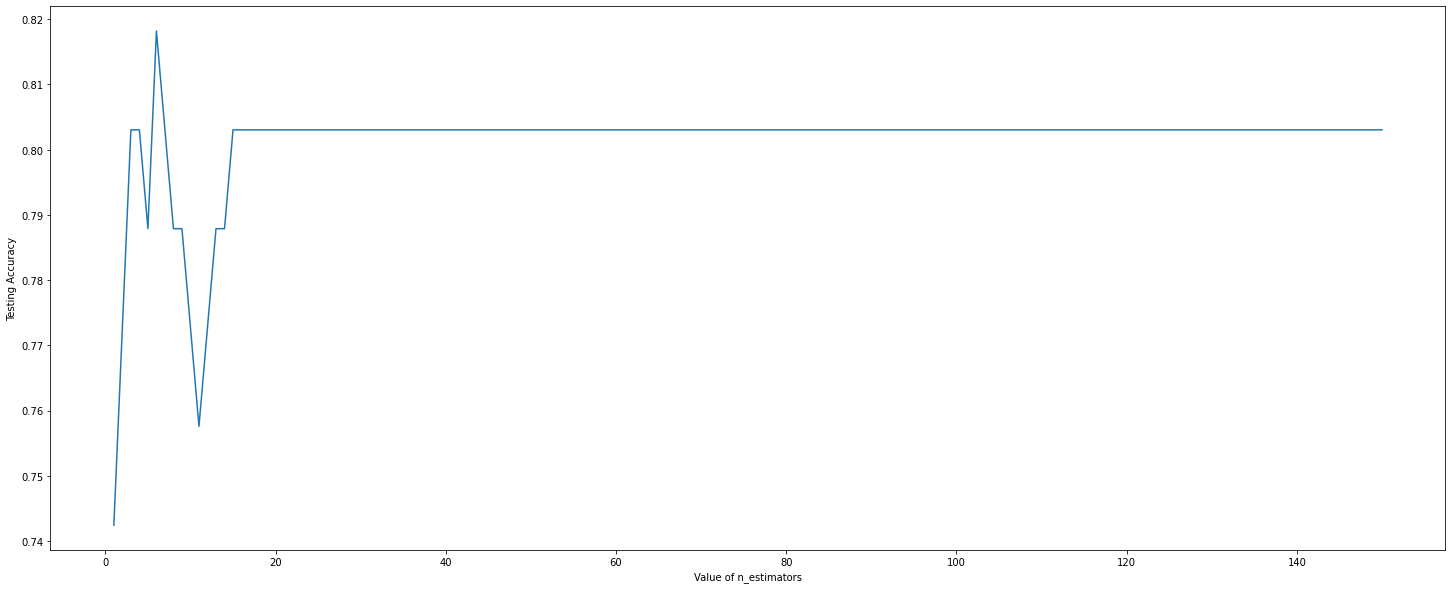

In [175]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
N=150
k_range = range (1,N+1)
scores={}
scores_list = []
for k in k_range:
  classifier = RandomForestClassifier(max_depth=k,random_state=0)
  classifier.fit(X_train, y_train)
  y_pred=classifier.predict(X_test)
  scores[k] = accuracy_score(y_test,y_pred)
  scores_list.append(accuracy_score(y_test,y_pred))
  print(str(k)+"/"+str(N)+" round completed......................... Accurecy: "+str(accuracy_score(y_test,y_pred)))



%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize = (25,10))
plt.plot(k_range,scores_list)
plt.xlabel('Value of n_estimators')
plt.ylabel ('Testing Accuracy')



print("The best Depth:")
best_depth=list(scores.keys())[scores_list.index(max(scores_list))]
print(best_depth)

In [176]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=best_estimator,random_state=0)
classifier.fit(X_train, y_train)
y_pred=classifier.predict(X_test)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result["Random Forest Best Estimator"]=accuracy_score(y_test, y_pred)

[[35  4]
 [ 5 22]]
              precision    recall  f1-score   support

     Control       0.88      0.90      0.89        39
     Patient       0.85      0.81      0.83        27

    accuracy                           0.86        66
   macro avg       0.86      0.86      0.86        66
weighted avg       0.86      0.86      0.86        66

Accurecy:  0.8636363636363636


In [177]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(max_depth=best_depth,random_state=0)
classifier.fit(X_train, y_train)
y_pred=classifier.predict(X_test)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result["Random Forest Best Max Depth"]=accuracy_score(y_test, y_pred)

[[34  5]
 [ 7 20]]
              precision    recall  f1-score   support

     Control       0.83      0.87      0.85        39
     Patient       0.80      0.74      0.77        27

    accuracy                           0.82        66
   macro avg       0.81      0.81      0.81        66
weighted avg       0.82      0.82      0.82        66

Accurecy:  0.8181818181818182


In [178]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=best_estimator,max_depth=best_depth,random_state=0)
classifier.fit(X_train, y_train)
y_pred=classifier.predict(X_test)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result["Random Forest All"]=accuracy_score(y_test, y_pred)

[[30  9]
 [ 6 21]]
              precision    recall  f1-score   support

     Control       0.83      0.77      0.80        39
     Patient       0.70      0.78      0.74        27

    accuracy                           0.77        66
   macro avg       0.77      0.77      0.77        66
weighted avg       0.78      0.77      0.77        66

Accurecy:  0.7727272727272727




---



---



#XGB

In [179]:


import xgboost as xgb
xgb_classifier = xgb.XGBClassifier(random_state=0)
xgb_classifier.fit(X_train,y_train)
y_pred = xgb_classifier.predict(X_test)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result["XGB Deafult"]=accuracy_score(y_test, y_pred)

[[31  8]
 [ 9 18]]
              precision    recall  f1-score   support

     Control       0.78      0.79      0.78        39
     Patient       0.69      0.67      0.68        27

    accuracy                           0.74        66
   macro avg       0.73      0.73      0.73        66
weighted avg       0.74      0.74      0.74        66

Accurecy:  0.7424242424242424


1/250 round completed......................... Accurecy: 0.7121212121212122
2/250 round completed......................... Accurecy: 0.8181818181818182
3/250 round completed......................... Accurecy: 0.7878787878787878
4/250 round completed......................... Accurecy: 0.7575757575757576
5/250 round completed......................... Accurecy: 0.7727272727272727
6/250 round completed......................... Accurecy: 0.7575757575757576
7/250 round completed......................... Accurecy: 0.7727272727272727
8/250 round completed......................... Accurecy: 0.7575757575757576
9/250 round completed......................... Accurecy: 0.7878787878787878
10/250 round completed......................... Accurecy: 0.7878787878787878
11/250 round completed......................... Accurecy: 0.7727272727272727
12/250 round completed......................... Accurecy: 0.7727272727272727
13/250 round completed......................... Accurecy: 0.7424242424242424
14/250 r

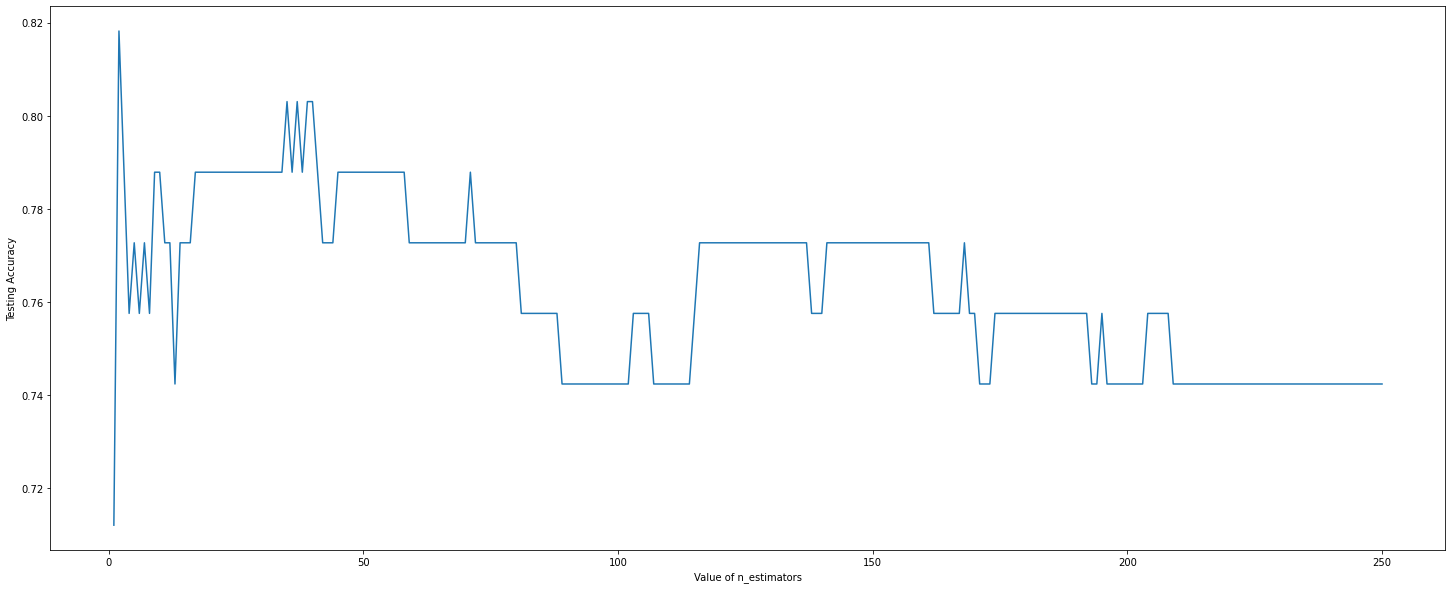

In [180]:
import xgboost as xgb
from sklearn.metrics import accuracy_score
N=250
k_range = range (1,N+1)
scores={}
scores_list = []
for k in k_range:
  xgb_classifier = xgb.XGBClassifier(n_estimators=k,random_state=0)
  xgb_classifier.fit(X_train, y_train)
  y_pred=xgb_classifier.predict(X_test)
  scores[k] = accuracy_score(y_test,y_pred)
  scores_list.append(accuracy_score(y_test,y_pred))
  print(str(k)+"/"+str(N)+" round completed......................... Accurecy: "+str(accuracy_score(y_test,y_pred)))


%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize = (25,10))
plt.plot(k_range,scores_list)
plt.xlabel('Value of n_estimators')
plt.ylabel ('Testing Accuracy')



print("The best n_estimators:")
best_estimator=list(scores.keys())[scores_list.index(max(scores_list))]
print(best_estimator)

1/250 round completed......................... Accurecy: 0.8181818181818182
2/250 round completed......................... Accurecy: 0.7878787878787878
3/250 round completed......................... Accurecy: 0.7424242424242424
4/250 round completed......................... Accurecy: 0.7575757575757576
5/250 round completed......................... Accurecy: 0.7121212121212122
6/250 round completed......................... Accurecy: 0.6818181818181818
7/250 round completed......................... Accurecy: 0.696969696969697
8/250 round completed......................... Accurecy: 0.7121212121212122
9/250 round completed......................... Accurecy: 0.7121212121212122
10/250 round completed......................... Accurecy: 0.7121212121212122
11/250 round completed......................... Accurecy: 0.7121212121212122
12/250 round completed......................... Accurecy: 0.7121212121212122
13/250 round completed......................... Accurecy: 0.7121212121212122
14/250 ro

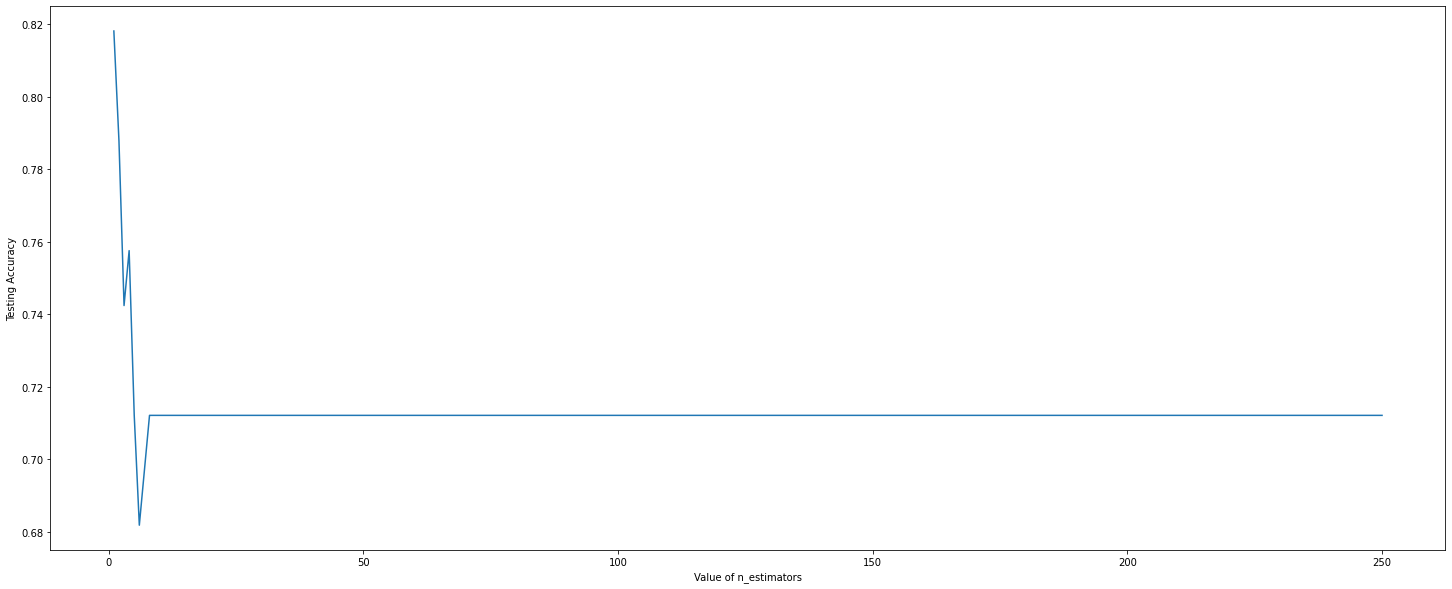

In [181]:
import xgboost as xgb
from sklearn.metrics import accuracy_score
N=250
k_range = range (1,N+1)
scores={}
scores_list = []
for k in k_range:
  xgb_classifier = xgb.XGBClassifier(max_depth=k,random_state=0)
  xgb_classifier.fit(X_train, y_train)
  y_pred=xgb_classifier.predict(X_test)
  scores[k] = accuracy_score(y_test,y_pred)
  scores_list.append(accuracy_score(y_test,y_pred))
  print(str(k)+"/"+str(N)+" round completed......................... Accurecy: "+str(accuracy_score(y_test,y_pred)))


%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize = (25,10))
plt.plot(k_range,scores_list)
plt.xlabel('Value of n_estimators')
plt.ylabel ('Testing Accuracy')



print("The best depth:")
best_depth=list(scores.keys())[scores_list.index(max(scores_list))]
print(best_estimator)

In [182]:
import xgboost as xgb
xgb_classifier = xgb.XGBClassifier(max_depth=best_depth,random_state=0)
xgb_classifier.fit(X_train,y_train)
y_pred = xgb_classifier.predict(X_test)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result["XGB Best Depth"]=accuracy_score(y_test, y_pred)

[[33  6]
 [ 6 21]]
              precision    recall  f1-score   support

     Control       0.85      0.85      0.85        39
     Patient       0.78      0.78      0.78        27

    accuracy                           0.82        66
   macro avg       0.81      0.81      0.81        66
weighted avg       0.82      0.82      0.82        66

Accurecy:  0.8181818181818182


In [183]:
import xgboost as xgb
xgb_classifier = xgb.XGBClassifier(n_estimators=best_estimator,random_state=0)
xgb_classifier.fit(X_train,y_train)
y_pred = xgb_classifier.predict(X_test)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result["XGB Best Estimator"]=accuracy_score(y_test, y_pred)

[[30  9]
 [ 3 24]]
              precision    recall  f1-score   support

     Control       0.91      0.77      0.83        39
     Patient       0.73      0.89      0.80        27

    accuracy                           0.82        66
   macro avg       0.82      0.83      0.82        66
weighted avg       0.83      0.82      0.82        66

Accurecy:  0.8181818181818182


In [184]:
import xgboost as xgb
xgb_classifier = xgb.XGBClassifier(n_estimators=best_estimator,max_depth=best_depth,random_state=0)
xgb_classifier.fit(X_train,y_train)
y_pred = xgb_classifier.predict(X_test)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result["XGB Best ALL"]=accuracy_score(y_test, y_pred)

[[25 14]
 [ 3 24]]
              precision    recall  f1-score   support

     Control       0.89      0.64      0.75        39
     Patient       0.63      0.89      0.74        27

    accuracy                           0.74        66
   macro avg       0.76      0.76      0.74        66
weighted avg       0.79      0.74      0.74        66

Accurecy:  0.7424242424242424


#NB

In [185]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result["NB Deafult"]=accuracy_score(y_test, y_pred)

[[29 10]
 [ 7 20]]
              precision    recall  f1-score   support

     Control       0.81      0.74      0.77        39
     Patient       0.67      0.74      0.70        27

    accuracy                           0.74        66
   macro avg       0.74      0.74      0.74        66
weighted avg       0.75      0.74      0.74        66

Accurecy:  0.7424242424242424




---



---



#Result

In [186]:
for i in result:
  print(i," : ",result[i])
  print("---------------------------------------------------------------")

ADA Default  :  0.7121212121212122
---------------------------------------------------------------
ADA Best Estimator  :  0.8181818181818182
---------------------------------------------------------------
Graddient Boosting Default  :  0.7878787878787878
---------------------------------------------------------------
Graddient Best Estimator  :  0.8181818181818182
---------------------------------------------------------------
Graddient Boost Best depth  :  0.8181818181818182
---------------------------------------------------------------
Graddient Boosting ALL  :  0.8181818181818182
---------------------------------------------------------------
KNN Default  :  0.7575757575757576
---------------------------------------------------------------
KNN Best Neighbors  :  0.7727272727272727
---------------------------------------------------------------
Random Forest Default  :  0.803030303030303
---------------------------------------------------------------
Random Forest Best Estimator  : 